In [32]:
#imports
import numpy as np
import matplotlib.pyplot as plt

## Util

In [33]:
#create plane and plot
def plot_v_dif(v_vector, w_vector):
    
    v = [float(v_vector[0]), float(v_vector[1])]
    w = [float(w_vector[0]), float(w_vector[1])]

    array = np.array([[0, 0, v[0], v[1]], 
                     [0, 0, w[0], w[1]]])

    X, Y, V, W = zip(*array)
    plt.figure()
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.annotate(f'v({v[0]},{v[1]})', (v[0],v[1]),fontsize=14)
    plt.scatter(v[0],v[1], s=10,c='red')
    ax.annotate(f'w({w[0]},{w[1]})', (w[0],w[1]),fontsize=14)
    plt.scatter(w[0], w[1], s=10,c='blue')
    ax.quiver(X, Y, V, W, angles='xy', scale_units='xy',color=['r','b'],scale=1)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    plt.grid()
    plt.draw()
    plt.show()

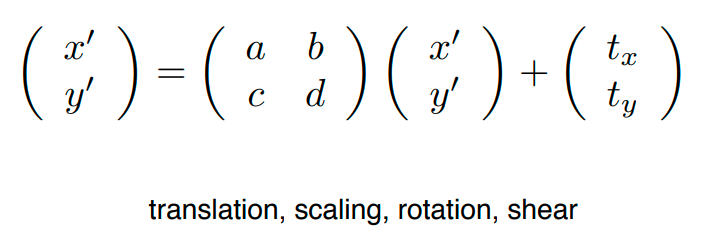

### Create Initial Vector

In [34]:
#set initial vector coordinates
# v: edit vx and vy
vx = 2
vy = 4

v_vector = np.matrix([[vx],[vy]])

### Examples

#### Matriz identidad (sin trasladar punto)

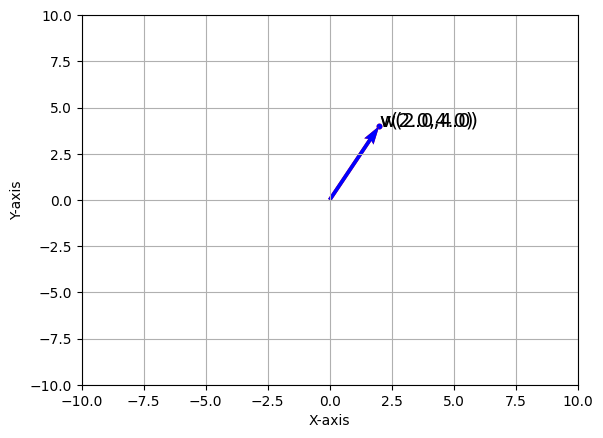

In [35]:
#apply a transformation

# for identity transformation
a, b, c, d = 1, 0, 0, 1
tx = 0
ty = 0

A =np.matrix([[a, b], [c, d]])
t_vector =np.matrix([[tx],[ty]])

# w (new / transformed vector)
#w = A*v + t

w_vector = np.matmul(A,v_vector) + t_vector

v = [float(v_vector[0]), float(v_vector[1])]
w = [float(w_vector[0]), float(w_vector[1])]

plot_v_dif(v, w)

#### Trasladar punto

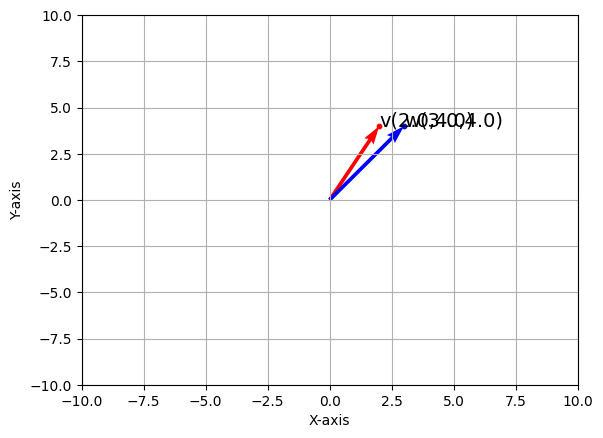

In [36]:
#apply a transformation

# edit a, b, c, d, tx, ty
a, b, c, d = 1, 0, 0, 1
tx = 1
ty = 0

A =np.matrix([[a, b], [c, d]])
t_vector =np.matrix([[tx],[ty]])

# w (new / transformed vector)
#w = A*v + t

w_vector = np.matmul(A,v_vector) + t_vector

plot_v_dif(v_vector, w_vector)

## Exercises

### Move

This function doesn't modify the vector's size, but it moves it around by adding constants to its value. 

t_vector is the one holding those numbers and we can freely change its values to modify the position of our original vector.

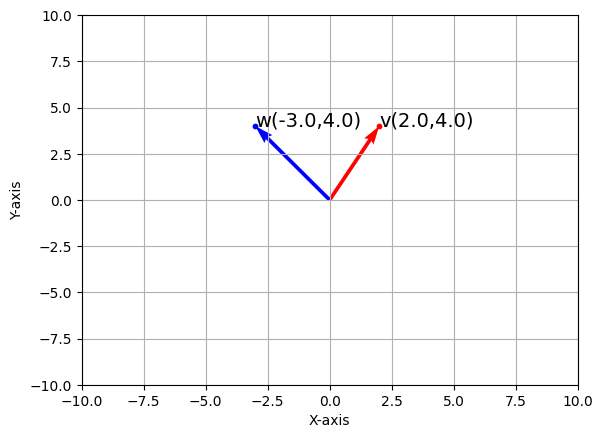

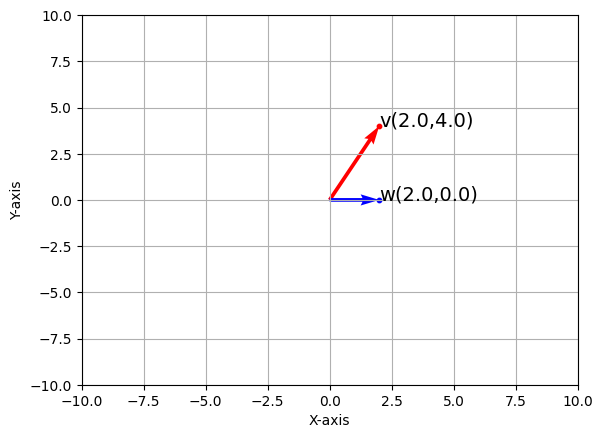

In [37]:
def Move(v, tX, tY):
    a, b, c, d = 1, 0, 0, 1
    tx, ty = tX, tY
    A =np.matrix([[a, b], [c, d]])
    t_vector = np.matrix([[tx],[ty]])
    return np.matmul(A,v) + t_vector

plot_v_dif(v_vector, Move(v_vector, -5, 0))
plot_v_dif(v_vector, Move(v_vector, 0, -4))

### Scale

Unlike move, scale doesn't change the vector's position by adding values, but it works by changing the size in each axis.

This is tout court achieved by multiplying the vector with a modified identity that will keep vector's characteristics in a different scale.

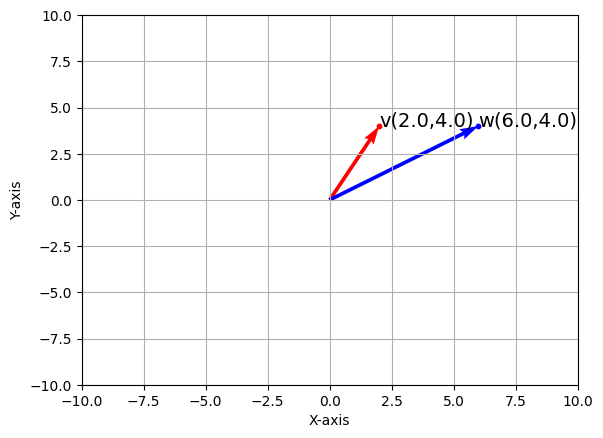

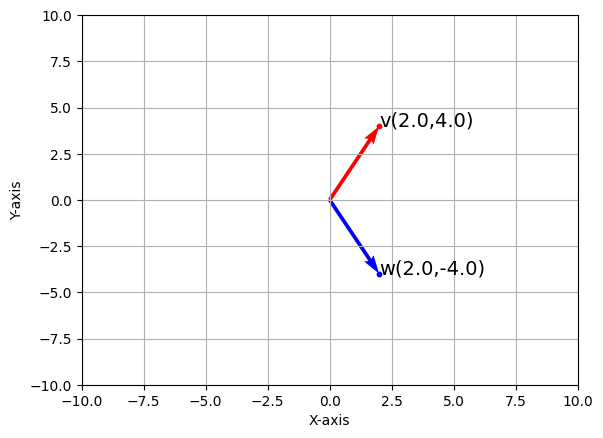

In [44]:
def Scale(v, sX, sY):
    a, b, c, d = sX, 0, 0, sY
    tx, ty = 0, 0
    A =np.matrix([[a, b], [c, d]])
    t_vector = np.matrix([[tx],[ty]])
    return np.matmul(A,v) + t_vector

plot_v_dif(v_vector, Scale(v_vector, 3, 1))
plot_v_dif(v_vector, Scale(v_vector, 1, -1))

### Rotate

This transformation is one of the least intuitives but it's easy to understand that by changing the identity matrix and using one with trigonometric functions instead, it's possible to change the vector's rotation using providing an angle only.

This angle is usually called theta and it should be given in radians.

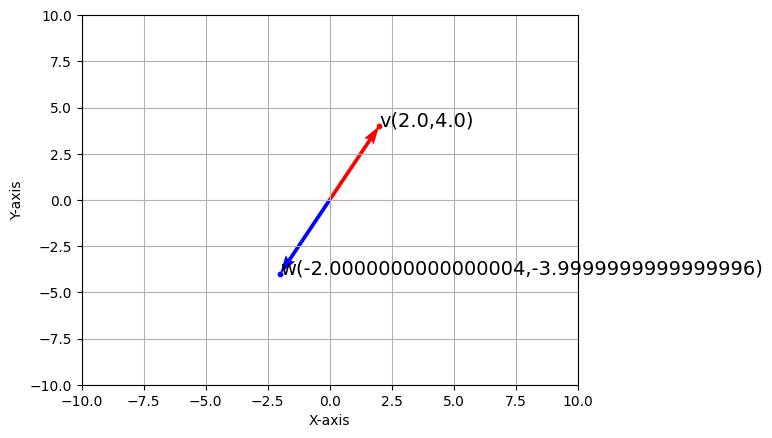

In [45]:
def Rotate(v, theta):
    a, b, c, d = np.cos(theta), -np.sin(theta), np.sin(theta), np.cos(theta)
    tx, ty = 0, 0
    A =np.matrix([[a, b], [c, d]])
    t_vector = np.matrix([[tx],[ty]])
    return np.matmul(A,v) + t_vector

plot_v_dif(v_vector, Rotate(v_vector, np.pi))

### Several transformations

Each of the previous transformartions may be a step of a series of changes, as seen in the following example, several operations can be aggregated to obtain a specific result.

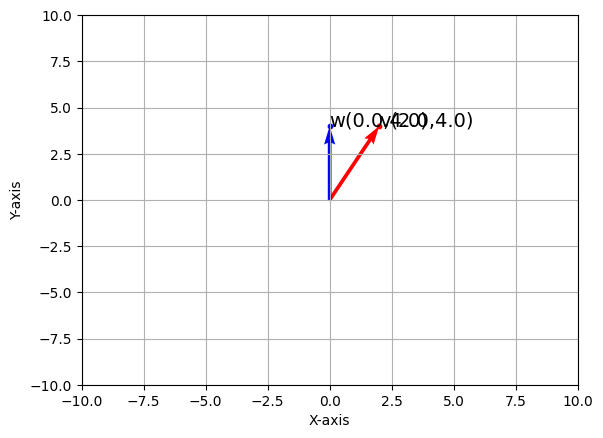

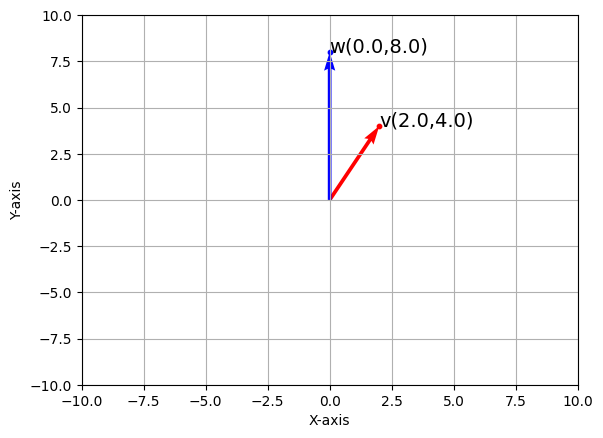

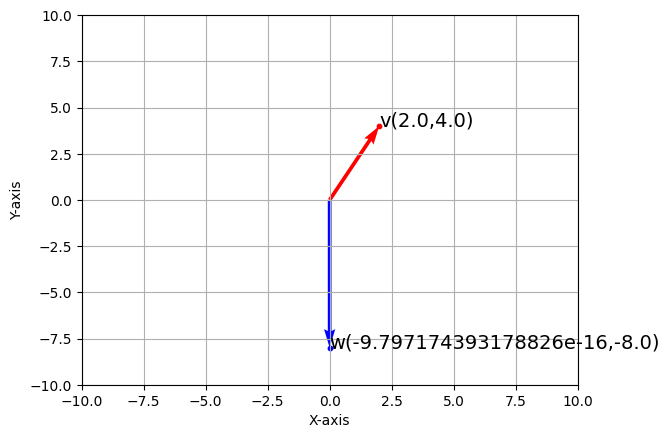

In [42]:
w = Move(v_vector, -2, 0)
plot_v_dif(v_vector, w)
w = Scale(w, 1, 2)
plot_v_dif(v_vector, w)
w = Rotate(w, np.pi)
plot_v_dif(v_vector, w)